## Plotting albedo values in one plot

Here you can learn how to plot the albedo of two different days in one plot

First, some packages:

In [1]:
# These packages are necessary later on. Load all the packages in one place for consistency
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import datetime

Let's load the data and calculate albedos for the all data

In [2]:
#The path of the directory where all AMF data are
path_dir = Path.cwd()/'data'/'1'
name_of_site = 'CA-Obs_clean.csv.gz'
path_data = path_dir/name_of_site
path_data.resolve()
df_data = pd.read_csv(path_data, index_col='time',parse_dates=['time'])
ser_alb=df_data['SWOUT']/df_data['SWIN']

Let's plot the albedo of one day

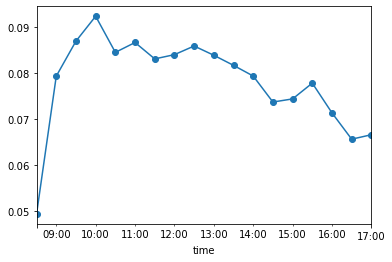

In [3]:
date1 = '2001 10 27'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].plot(marker='o')

And for another day

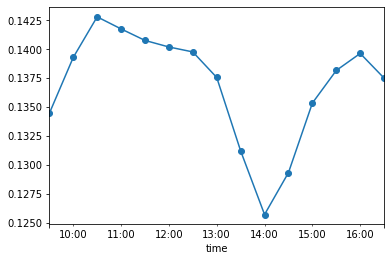

In [4]:
date2 = '2001 11 21'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2].plot(marker='o')

Let's first try to put the albedo of both days in one plot using previous methods

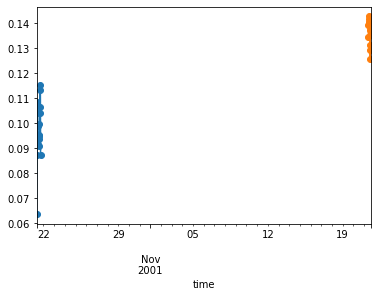

In [5]:
date1 = '2001 10 21'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].plot(marker='o')
date2 = '2001 11 21'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2].plot(marker='o')

You see that since the days are different, we do not get a good plot. 

In order to fix this, we need to find the time of the day each data point is associated with. For example, for date1, we can find it with using the time level of the index as `Dataframe.index.time` :

In [6]:
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].index.time

array([datetime.time(8, 30), datetime.time(9, 0), datetime.time(9, 30),
       datetime.time(10, 0), datetime.time(10, 30), datetime.time(11, 0),
       datetime.time(11, 30), datetime.time(12, 0), datetime.time(12, 30),
       datetime.time(13, 0), datetime.time(13, 30), datetime.time(14, 0),
       datetime.time(14, 30), datetime.time(15, 0), datetime.time(15, 30),
       datetime.time(16, 0), datetime.time(16, 30), datetime.time(17, 0),
       datetime.time(17, 30)], dtype=object)

Now let's get this for both dates

In [7]:
X1=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].index.time
X2=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2].index.time
Y1=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1]
Y2=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2]


Let's try to plot them then in one figure

Text(0, 0.5, 'albedo')

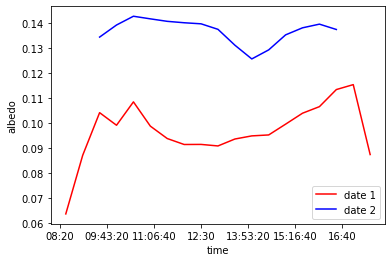

In [8]:
plt.plot(X1,Y1,'r',label='date 1')
plt.plot(X2,Y2,'b',label='date 2')
plt.legend()
plt.ylabel('albedo')

Much better! but still the xticks are a little bit messy. We can use the follwoing to fix this issue

([<matplotlib.axis.XTick at 0x11430ba58>,
 <a list of 4 Text xticklabel objects>)

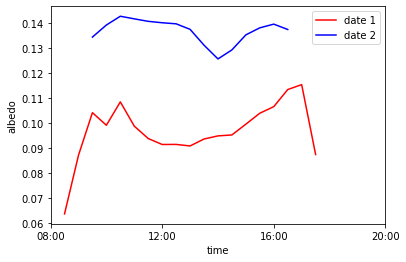

In [9]:
plt.plot(X1,Y1,'r',label='date 1')
plt.plot(X2,Y2,'b',label='date 2')
plt.legend()
plt.ylabel('albedo')
plt.xticks([datetime.time(x, 0) for x in [8,12,16,20]])